##*Elizabeth Torres Torrecillas* 

# *Actividad 11*



---



---



---


In [88]:
#Importar bibliotecas a utilizar 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import linspace, zeros
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

### Solución Numérica de la Ecuación de Onda

La ecuación de onda es una ecuación diferencial parcial de segundo orden en el tiempo y las coordenadas espaciales y tiene la forma

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2} +
  \frac{\partial^2 u}{\partial y^2} +
  \frac{\partial^2 u}{\partial z^2} \right) + f(x,y,z,t)
\end{equation*}

donde $c^2$ es la velocidad de propagación de la información. La función $u(x,y,z,t)$ representa la presión en una onda acústica, la intensidad de un campo electromagnético, el desplazamiento respecto a un nivel de referencia como lo puede ser la amplitud de una onda superficial en la superficie del agua o el desplazamiento respecto a la horizontal de una cuerda vibrante. 

En una dimensión, por ejemplo el caso de una cuerda vibrante, la Ecuación de Onda se simplifica a 

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) + f(x,t) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

Requerimos definir 4 condiciones: 2 iniciales (derivada de segundo orden en t) y 2 a la frontera (segundo orden en el espacio), para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}

Se requiere también especificar el valor de la constante $c$ y la función $I(x)$.



**Solución de la Ecuación de Onda en una dimensión por el Método de Diferencias Finitas.**

Podemos comenzar aproximando las segundas derivadas por diferencias finitas centradas de segundo orden.

Si $h$ es el incremento en la dirección $x=\Delta x$ y $k=\Delta t$ es el incremento en el tiempo. Entonces en un punto de la malla discreta $(x,t)$ tendremos

\begin{equation*}
\frac{u(x,t+k) -2u(x,t) + u(x,t-k)}{k^2} = c^2
\frac{u(x+h,t) -2u(x,t) + u(x-h,t)}{h^2}
\end{equation*}

La ecuación anterior define un esténcil computacional de 5 puntos y se respresenta como

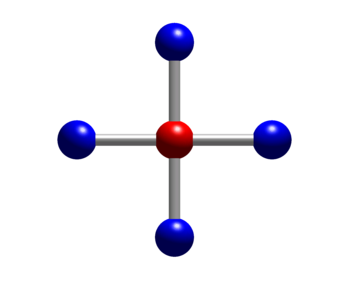

El cual nos permite calcular los valores de $u(x,t)$ en el espacio discretizado:
$x_0=0,x_1,x_2,\ldots, x_M=L$, $t_0=0, t_1, t_2, \ldots, t_N=T$, espaciados uniformamente por $h = \Delta x$ y $k=\Delta t$.  

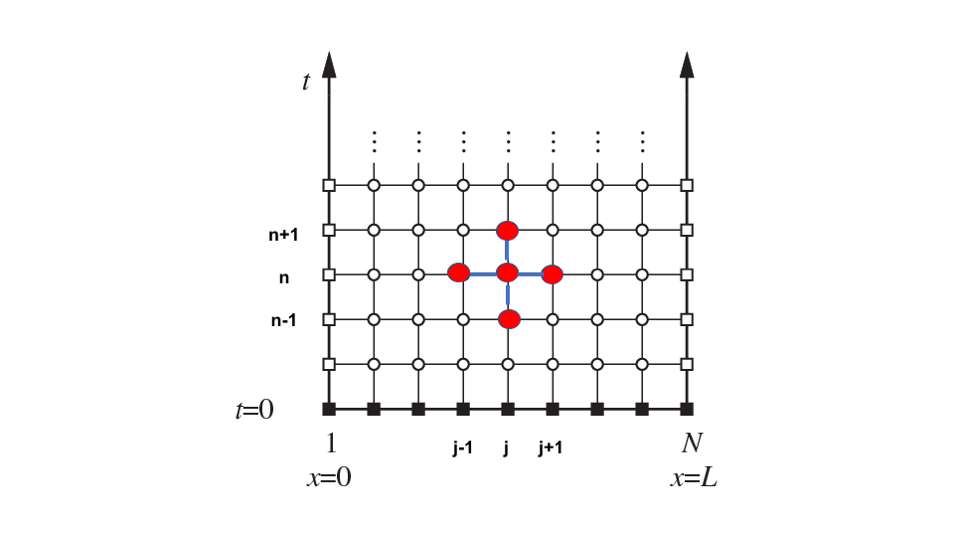


Para inicial el algoritmo tendremos que calcular el primer nivel de $u(x,k)$ en $t=k$, usando sólo la información de la condición inicial, con otro esténcil de 4 puntos similar al que utilizamos en la Ecuación de Calor.

Una vez hecho esto, ya podremos calcular todos los valores futuros de $u(x,t+k)$ ya que se conocen los valores de $u(x,t)$ y $u(x,t-k)$.

**Ecuación de Onda en diferencias finitas**

Si definimos $u(x,t) = u(jh, nk) = u_j^n$, la ecuación de onde la podemos expresar 

\begin{equation*}
\frac{u_j^{n+1} - 2 u_j^n + u_j^{n-1}}{k^2} = c^2
\frac{u_{j+1}^n - 2 u_j^n + u_{j-1}^n}{h^2}
\end{equation*}

y despejamos para el valor desconocido $u_j^{n+1}$

\begin{equation*}
u_j^{n+1} = 2 u_j^n - u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n)
\end{equation*}

donde hemos introducido la constante $C^2 = c^2 k^2/h^2$, conocida como la constante de Courant.

**Iniciando el algoritmo**

Como no se puede aplicar el esténcil de 5 puntos pata calcular el primer nivel usaremos un esténcil similar de 4 puntos con la información de la condición inicial para calcular $u(x,t=k)$.

Remplazamos la condición inicial por diferencias finitas centradas de segundo orden

\begin{equation*}
\frac{\partial}{\partial t} u_j^0 = 
\frac{u_j^1 - u_j^{-1}}{2k}  = 0 
\end{equation*}

lo que indica que $u_j^1 = u_j^{-1}$.

Sustituimos la igualdad anterior en la ecuación de onda y nos queda que

\begin{equation*}
u_j^1 = u_j^0 + \frac{C^2}{2} (u_{j+1}^0 -2 u_j^0 + u_{j-1}^0)
\end{equation*}

Y ya tendremos dos niveles de valores para $u(x,t)$ para calcular los valores de $u_j^{n+1}$ usando el esténcil de 5 puntos. 



---



---



**Ejercicio 1:**

Modifique el algoritmo de diferencias finitas empleado anteriormente y resuelva la ecuación de onda amortiguada en una dimensión, dada por la ecuación

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} + 
 b \frac{\partial u}{\partial t}
 = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

donde $b \ge 0 $ y $c$ son constantes. 

Se proporcionan las condiciones iniciales y a la frontera para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}

Utilice diferencias finitas centradas de segundo orden para aproximar la primer derivada $\partial u/\partial t$.

\begin{equation*}
\frac{\partial}{\partial t} u(x,t) \approx \frac{u(x,t+k) - u(x,t-k)}{2k}
\end{equation*}

Suponga las mismas características del ejemplo presentado anteriormente $L=10$, $c=100$m/s, $t=(0,0.25)$, y coeficiente de amortiguamiento $b=0.5$ con condiciones iniciales $u(x,0) = x(1-x)$ y $\partial u(x,0) / \partial t = 0$ y condiciones a la frontera $u(0,t)=u(L,t)=0$. 


* A partir del método de diferencias finitas de segundo orden. 


Determinamos las ecuaciones de diferencias finitas para obtener la ecuación diferencial parcial.  

Para calcular el primer nivel de u(h,k) en $t=k$, utilizando la información de la condición inical, tomamos:

$h$ como el incremento en la dirección $x=\Delta x$ 

$k=\Delta t$ como el incremento en el tiempo, entonces tendremos que un punto de la malla discreta $(x,t)$ será de la forma:

$$\begin{equation*}
\frac{u(x,t+k) -2u(x,t) + u(x,t-k)}{k^2}  + b \frac{u(x,t+k) - u(x,t-k)}{2k}= c^2
\frac{u(x+h,t) -2u(x,t) + u(x-h,t)}{h^2}
\end{equation*}$$

Conocemos los valores de $u(x,t)$ y $u(x,t-k)$., entonces los valores futuros de $u(x,t+k)$ podrán determinarse


Definimos:
 $$u(x,t) = u(jh, nk)$$

Entonces, lo expresamos como:
  $$u(x,t)= u_j^n$$

Con ello, podemos reescribir a la ecuación de onda como:

$$\begin{equation*}
\frac{u_j^{n+1} - 2 u_j^n + u_j^{n-1}}{k^2} + b \frac{u_j^{n+1} - u_j^{n-1}}{2k} = c^2
\frac{u_{j+1}^n - 2 u_j^n + u_{j-1}^n}{h^2}
\end{equation*}$$


Despejamos $u_j^{n+1}$
$$\begin{equation*}
u_j^{n+1} = 2 u_j^n - u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n) - \frac{bk}{2} (u_j^{n+1} - u_j^{n-1})
\end{equation*}$$


Donde hemos introducido la constante de Courant $C^2 = c^2 k^2/h^2$

Conocemos que no es posible aplicar el esténcil de 5 puntos para determinar el primer nivel, entonces haremos uso del esténcil de 4 puntos con base en la condición inicial proporconada.

Tenemos que para calcular $u(x,t=k)$, obtenemos que:

$$\begin{equation*}
\left(1 + \frac{bk}{2} \right)u_j^{n+1} = 2 u_j^n - u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n)  + \frac{bk}{2} u_j^{n-1}
\end{equation*}$$
Conociendo que el término  $\dfrac{bk}{2} $  es constante, lo reenombramos como A:

$$\begin{equation*}
\left(1 + A \right)u_j^{n+1} = 2 u_j^n - u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n)  + A u_j^{n-1}
\end{equation*}$$


Despejamos $u_j^{n+1}$:

$$\begin{equation*}
u_j^{n+1} = \frac{1}{A+1} \left[ 2 u_j^n + (A - 1) u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n) \right]
\end{equation*}$$


Remplazamos la condición inicial por diferencias finitas centradas de segundo orden

$$\begin{equation*}
\frac{\partial}{\partial t} u_j^0 = 
\frac{u_j^1 - u_j^{-1}}{2k}
\end{equation*}$$


$$\begin{equation*}
\frac{\partial}{\partial t} u_j^0 = 0 
\end{equation*}$$

Entonces, podemos decir que  $u_j^1 = u_j^{-1}$

Sustituimos la igualdad anterior en la ecuación de onda:

$$\begin{equation*}
u_j^1 = u_j^0 + \frac{C^2}{2} (u_{j+1}^0 -2 u_j^0 + u_{j-1}^0)
\end{equation*}$$

Con los cual tenemos dos niveles de valores para  $u(x,t)$, con los cuales podremos  calcular los valores de $u_j^{n+1}$ usando el esténcil de 5 puntos.




In [89]:
#Definimos la función para resolver la ecuación de onda
def solver(I, V, c, b, L, Nx, T, Nt, user_action=None):
    ##En x
    #Malla en x
    x = linspace(0, L, Nx+1) 
    dx = x[1] - x[0]
    ##En t
    #Malla en t
    t = linspace(0, T, Nt+1) 
    dt= t[1]-t[0]
    #Simplificamos el algoritmo
    a = b*dt/2+1           
    beta = 1-b*dt/2         
    #Simplificamos la ecuación
    C2 = (dt*c/dx)**2        
    
    if V is None or V == 0:
        V = lambda x: 0
    #Solución al nuevo tiempo
    u = zeros(Nx+1) 
    #Solución 1 paso atrás en el tiempo
    u_1 = zeros(Nx+1) 
    #Solución 2 pasos atrás en el tiempo
    u_2 = zeros(Nx+1)

    #Condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    #Fórmula del primer paso 
    for i in range(1, Nx):
        u[i] = u_1[i] + dt*V(x[i]) + \
        0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1])
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        #Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = (1/a)*(2*u_1[i]-beta*u_2[i]+C2*(u_1[i+1]-2*u_1[i]+u_1[i-1]))
        #Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        #Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u
    return u, x, t

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

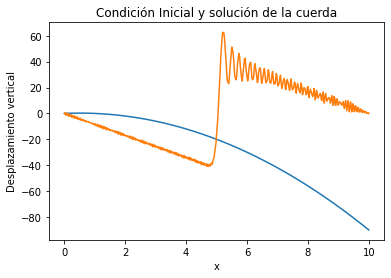

In [90]:
#Parámetros
#L: Longitud de la cuerda
L=10      
#Nx: Número de pasos en x
Nx=500   
#Nt: Número de pasos en t
Nt=2000 
#Velocidad de la onda (m/s)  
c=100    
#b = constante de amortiguamiento
b=0.5 
#T: Tiempo final de Integración
T=0.25   

#Guardamos la información de la solución
user_data={}
u, x, t = solver(lambda x: x*(1-x), None, c, b, L, Nx, T, Nt, user_action=user_action)

#Graficamos la solución
I=x*(1-x)

plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y solución de la cuerda')
plt.plot(x,I)
plt.plot(x,u)
plt.show()

In [91]:
#Realizamos una gráfica tipo animación
#Segundos que durará la animación
duration = 15
#Tamaño de la gráfica de animación
fig, ax = plt.subplots(figsize=(4, 3), facecolor='white', dpi=92)
plt.tight_layout()

#Frames
def make_frame_mpl(t):
    n = int(t / duration * (len(user_data['u']) - 1))
    ax.clear()
    x = user_data['x']
    t, u = user_data['u'][n]
    ax.plot(x, u, color='cyan')
    ax.set_title('t = {:.2f}'.format(t))
    ax.set_ylim(-90, 90)
    ax.set_xlabel('x (a. u.)')
    ax.set_ylabel('Desplazamiento vertical (a. u.)')
    #Imágen de la figura
    return mplfig_to_npimage(fig) 

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, width=600)

100%|█████████▉| 300/301 [00:22<00:00, 13.22it/s]




---


---




**Ejercicio 2:**

Haga el desarrollo del algoritmo de diferencias finitas centradas para resolver la ecuación de onda en 1 dimensión si se tiene un término de forzamiento $f(x,t)$

\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) + f(x,t) \qquad x \in (0,L], t \in (0,T]
\end{equation*}

Con las condiciones iniciales y a la frontera para encontrar la solución.

\begin{eqnarray*}
u(x,0) & = & I(x) \\
\frac{\partial}{\partial t} u(x,0) & = & 0 \\
u(0,t) & = & 0 \\
u(L,t) & = & 0 \\
\end{eqnarray*}


* A partir del método de diferencias finitas de segundo orden. 


Determinamos las ecuaciones de diferencias finitas para obtener la ecuación diferencial parcial.  

Para calcular el primer nivel de u(h,k) en $t=k$, utilizando la información de la condición inical, tomamos:

$h$ como el incremento en la dirección $x=\Delta x$ 

$k=\Delta t$ como el incremento en el tiempo, entonces tendremos que un punto de la malla discreta $(x,t)$ será de la forma:


$$\begin{equation*}
\frac{u(x,t+k) -2u(x,t) + u(x,t-k)}{k^2}  = c^2
\frac{u(x+h,t) -2u(x,t) + u(x-h,t)}{h^2} + f(x, t)
\end{equation*}$$


Conocemos los valores de $u(x,t)$ y $u(x,t-k)$., entonces los valores futuros de $u(x,t+k)$ podrán determinarse


Definimos:
$$u(x,t) = u(jh, nk)$$
Entonces, lo expresamos como:
$$u(x,t) =u_j^n$$$

Además siendo:
$$f(x, t) = f(jh, nk)$$
Entonces, lo expresamos como:
$$f(x, t) = f_j^n$$


Con ello, podemos reescribir a la ecuación de onda como:

$$\begin{equation*}
\frac{u_j^{n+1} - 2 u_j^n + u_j^{n-1}}{k^2} = c^2
\frac{u_{j+1}^n - 2 u_j^n + u_{j-1}^n}{h^2} + f_j^n
\end{equation*}$$


Despejamos $u_j^{n+1}$


$$\begin{equation*}
u_j^{n+1} = 2 u_j^n - u_j^{n-1} + C^2 (u_{j+1}^n - 2 u_j^n + u_{j-1}^n) +k^2 f_j^n
\end{equation*}$$



Donde $f_j^n = f(jh, nk)$.

Donde hemos introducido la constante de Courant $C^2 = c^2 k^2/h^2$

Remplazamos la condición inicial por diferencias finitas centradas de segundo orden

$$\begin{equation*}
\frac{\partial}{\partial t} u_j^0 = 
\frac{u_j^1 - u_j^{-1}}{2k}  = 0 
\end{equation*}$$

Entonces, podemos decir que  $u_j^1 = u_j^{-1}$

Sustituimos la igualdad anterior en la ecuación de onda:


$$\begin{equation*}
u_j^1 = u_j^0 + \frac{C^2}{2} (u_{j+1}^0 -2 u_j^0 + u_{j-1}^0) + \frac{k^2}{2} f_j^0
\end{equation*}$$

Con los cual tenemos dos niveles de valores para  $u(x,t)$, con los cuales podremos  calcular los valores de $u_j^{n+1}$ usando el esténcil de 5 puntos.


In [92]:
#Definimos la función para resolver la ecuación de onda
def solver(I, V, f, c, b, L, Nx, T, Nt, user_action=None):
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    ##En x
    #Malla en x
    x = linspace(0, L, Nx+1) 
    dx = x[1] - x[0]
    ##En t
    #Malla en t
    t = linspace(0, T, Nt+1) 
    dt= t[1]-t[0]         
    #Simplificamos la ecuación
    C2 = (dt*c/dx)**2       

    #Ajuste para condiciones de frontera
    if V is None or V == 0:
        V = lambda x: 0

     #Ajuste para la función de forzamiento
    if f is None or f == 0:
        f = lambda x, t:0

    #Solución al nuevo tiempo
    u = zeros(Nx+1) 
    #Solución 1 paso atrás en el tiempo
    u_1 = zeros(Nx+1) 
    #Solución 2 pasos atrás en el tiempo
    u_2 = zeros(Nx+1)

    #Condición inicial en u_1
    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    #Fórmula del primer paso 
    for i in range(1, Nx):
        u[i] = u_1[i] + \
        0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) + \
        0.5*dt**2*f(x[i], 0)
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    # Redefinimos variables para volver a utilizar
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        #Actualiza los valores en el tiempo t[n+1]
        for i in range(1, Nx):
            u[i] = 2*u_1[i]-u_2[i]+C2*(u_1[i+1]-2*u_1[i]+u_1[i-1])+dt**2*f(x[i], t[n])
        #Definimos la condición a la frontera
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        # Redefinimos variables antes del siguiente paso
        u_2[:], u_1[:] = u_1, u

    return u, x, t

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

No handles with labels found to put in legend.


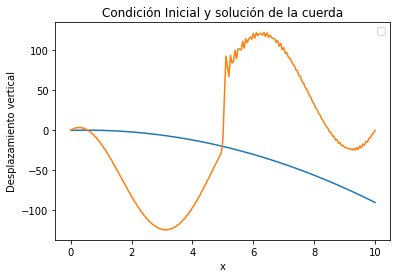

In [93]:
#Parámetros
#L: Longitud de la cuerda
L=10      
#Nx: Número de pasos en x
Nx=200   
#Nt: Número de pasos en t
Nt=501 
#Velocidad de la onda (m/s)  
c=100   
#T: Tiempo final de Integración
T=0.25   

#Guardamos la información de la solución
user_data={}
u, x, t = solver(lambda x: x*(1-x), None, lambda x, t: 20*np.cos(x)*np.exp(43*t), c, b, L, Nx, T, Nt, user_action=user_action)

#Graficamos la solución
I=x*(1-x)

plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y solución de la cuerda')
plt.plot(x,I)
plt.plot(x,u)
plt.show()


In [94]:
#Realizamos una gráfica tipo animación
#Segundos que durará la animación
duration = 15
#Tamaño de la gráfica de animación
fig, ax = plt.subplots(figsize=(4, 3), facecolor='white', dpi=92)
plt.tight_layout()

#Frames
def make_frame_mpl(t):
    n = int(t / duration * (len(user_data['u']) - 1))
    ax.clear()
    x = user_data['x']
    t, u = user_data['u'][n]
    ax.plot(x, u, color='gold')
    ax.set_title('t = {:.2f}'.format(t))
    ax.set_ylim(-90, 90)
    ax.set_xlabel('x (a. u.)')
    ax.set_ylabel('Desplazamiento vertical (a. u.)')
    #Imágen de la figura
    return mplfig_to_npimage(fig) 

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, width=600)

100%|█████████▉| 300/301 [00:22<00:00, 13.23it/s]


**Ejercicio 3.**

Resuelva la Ecuación KdV, para el caso de 2 solitones comenzando en $x01 = 0.25*L$ y $x02 = 0.75*L$, con velocidades $c1=0.75$ y $c2=0.01$ e integre hasta que una de las ondas llegue a la frontera.

Grafique las soluciones como en el ejemplo que se proporcionó.



Calculando la solución.
Graficando una representación de la interacción de 2 ondas solitarias.


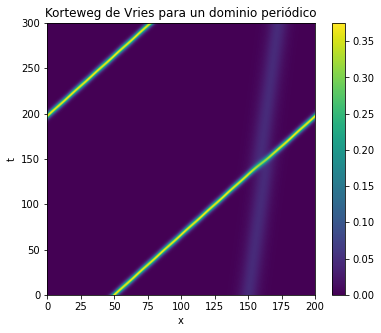

In [95]:
#Definimos la función para resolver la Ecuación de KdV en un dominio periódico
def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    #Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    #Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    #Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    #Tamaño del dominio y crea una malla discretizada.
    L = 200.0
    #N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
    Nx = 256
    #dx < 0.8
    dx = L / (Nx - 1.0) 
    # L < N
    x = np.linspace(0, (1-1.0/Nx)*L, Nx)

    ###Definimmos las condiciones iniciales
    #Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
    #Un soliton a la izquierda del otro. Posicionados en x-x01 y x-x02, 
    #Con velocidades c1 > c2 que provocará que colisionen entre si (el primero alcance al segundo)
    x01 = 0.25*L
    x02 = 0.75*L
    c1= 0.75
    c2= 0.09
    #+kdv_exact(x02+L/10-x, 0.9*c2)
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) 
    
    #Definimos el tamaño del dominio en el tiempo
    #Tiempo final T
    T = 300
    Nt = 501
    t = np.linspace(0, T, Nt)

    print("Calculando la solución.")
    sol = kdv_solution(u0, t, L)

    print("Graficando una representación de la interacción de 2 ondas solitarias.")

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()

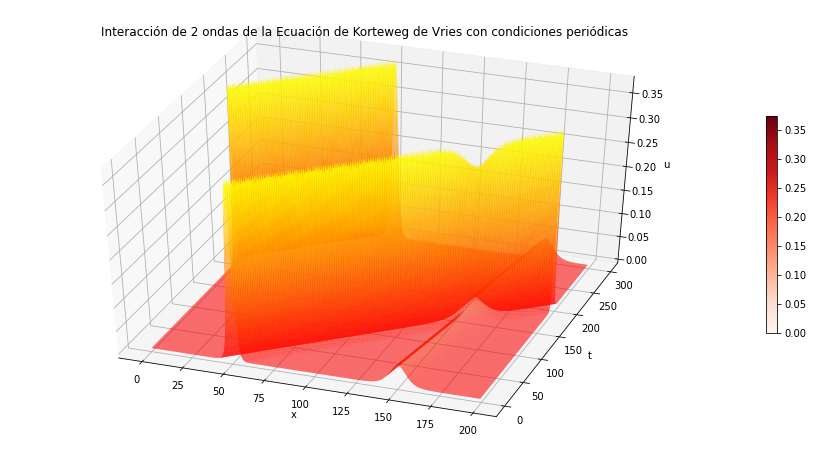

In [96]:
  #Gráfica tipo superfices en 3D en evolución
  fig = plt.figure(figsize=(16,8))
  ax = fig.add_subplot(111, projection='3d')

  SX, ST = np.meshgrid(x, t)

  ax.plot_surface(SX, ST, sol, cmap='autumn', rstride=1, cstride=1, alpha=0.75)

  #Grafica una tabla de valores 
  m = cm.ScalarMappable(cmap='Reds')
  m.set_array(sol)
  plt.colorbar(m,shrink=0.5)

  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.set_zlabel('u')  
  ax.view_init(elev=40, azim=-70)
  ax.set_title('Interacción de 2 ondas de la Ecuación de Korteweg de Vries con condiciones periódicas')
  plt.show()
    



---



---



**Ejercicio 4:**

Resuelva la Ecuación KdV, para el caso de 3 solitones comenzando en $x01 = 0.25*L$, $x02=0.5*L$, y $x03 = 0.75*L$, con velocidades $c1=0.75$, $c2=0.5$ y $c3=0.25$ e integre hasta que una de las ondas llegue a la frontera.

Grafique las soluciones.

Calculando la solución.
Graficando una representación de la interacción de 2 ondas solitarias.


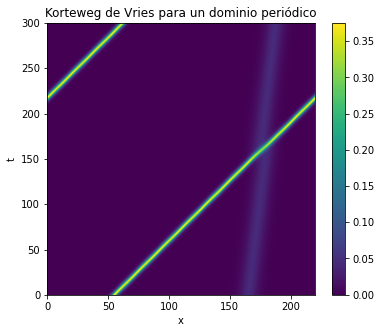

In [97]:
#Definimos la función para resolver la Ecuación de KdV en un dominio periódico
def kdv_exact(x, c):
    """Perfil de la solución exacta de la Ecuación KdV: 1 solitón sobre el eje real"""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Las ecuaciones diferenciales de la ecuación KdV, discretizada en x"""
    #Calcula las derivadas en x usando un método pseudoespectral (Transformada de Fourier)
    #Supone tener condiciones periódicas en la dirección x
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    #Calcula el lado derecho de la ecuación de KdV 
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    """Utiliza la función odeint para integrar la ecuación KdV sobre un dominio periódico.
    `u0` es la condición inicial, `t` es el arreglo de tiempos en los que se evaluará la ecuación, 
     y `L` es el tamaño del dominio periódico en x"""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":  
  #Tamaño del dominio y crea una malla discretizada.
  L = 220.0 
  #N=potencia de 2^n (exigencia de la transformada rápida de Fourier FFT)
  Nx = 256

  #dx < 0.8
  dx = L / (Nx - 1.0) 
  #L < N
  x = np.linspace(0, (1-1.0/Nx)*L, Nx) 

  #Definir las condiciones iniciales
  #Dos solitones (ondas solitarias) viajando hacia la derecha en un dominio periódico
  #Un soliton a la izquierda del otro. Posicionados en x-x01 y x-x02, 
  #Con velocidades c1 > c2 que provocará que colisionen entre si (el primero alcance al segundo)   
  x01 = 0.25*L   
  x02 = 0.75*L
  c1= 0.75
  c2= 0.09
  #+ kdv_exact(x02+L/10-x, 0.9*c2)
  u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) 
    
  #Definir el tamaño del dominio en el tiempo
  #Tiempo final T
  T = 300
  Nt = 501
  t = np.linspace(0, T, Nt)

  print("Calculando la solución.")
  sol = kdv_solution(u0, t, L)

  print("Graficando una representación de la interacción de 2 ondas solitarias.")

  #Graficamos
  plt.figure(figsize=(6,5))
  plt.imshow(sol[::-1, :], extent=[0,L,0,T])
  plt.colorbar()
  plt.xlabel('x')
  plt.ylabel('t')
  plt.axis('auto')
  plt.title('Korteweg de Vries para un dominio periódico')
  plt.show()

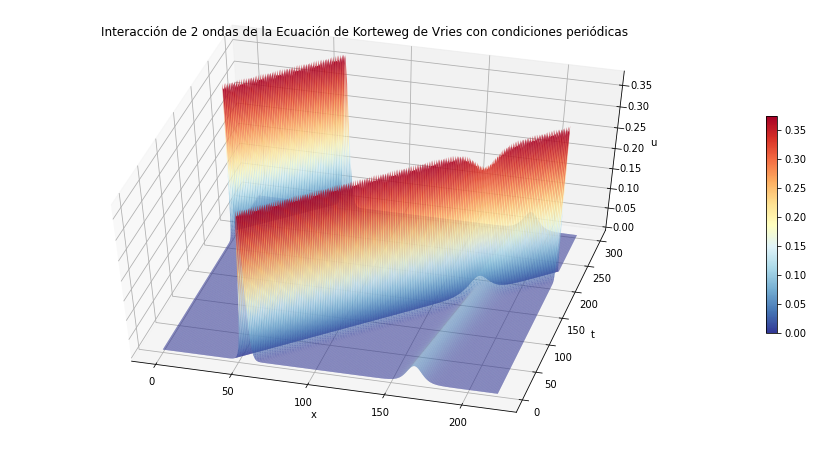

In [98]:
  #Gráfica tipo superfices en 3D en evolución
  fig = plt.figure(figsize=(16,8))
  ax = fig.add_subplot(111, projection='3d')

  SX, ST = np.meshgrid(x, t)
  ax.plot_surface(SX, ST, sol, cmap='RdYlBu_r', rstride=1, cstride=1, alpha=0.75)

  #Grafica una tabla de valores 
  m = cm.ScalarMappable(cmap='RdYlBu_r')
  m.set_array(sol)
  plt.colorbar(m,shrink=0.5)

  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.set_zlabel('u')
  ax.view_init(elev=50, azim=-75)
  ax.set_title('Interacción de 2 ondas de la Ecuación de Korteweg de Vries con condiciones periódicas')
  plt.show()



---



---



**Ejercicio 5:**

En el ejemplo resuleto anterior, se mostró la evolución de la condición inicial 

\begin{equation*}
u_0^{(2,1)}(x,y,0) = sin (\pi x) \sin (\frac{\pi y}{2})
\end{equation*}

mostrando el *modo (1,2)* de oscilación natural de la membrana ([Ver estas animaciones](https://www.acs.psu.edu/drussell/Demos/MembraneSquare/Square.html)). 
 
En este Ejercicio se pide mostrar la evolución del *modo (1,1)*, con la condición inicial 

\begin{equation*}
u_0^{(1,1)}(x,y,0) = \sin (\frac{\pi x}{2}) \sin (\frac{\pi y}{2})
\end{equation*}

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


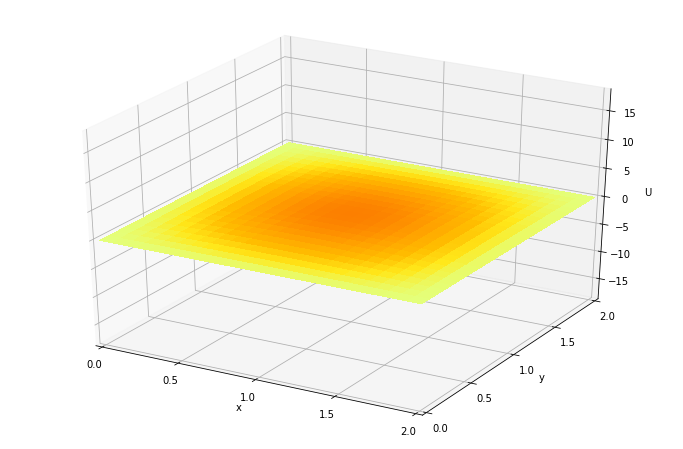

paso: 10.0 t= 0.285


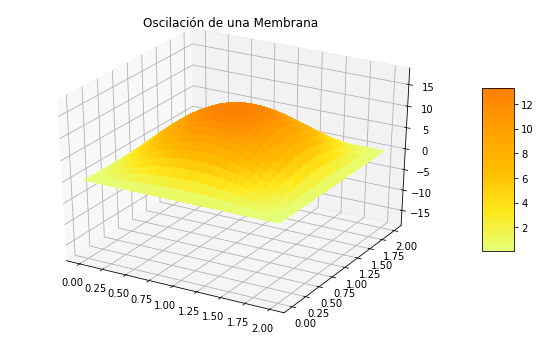

paso: 20.0 t= 0.585


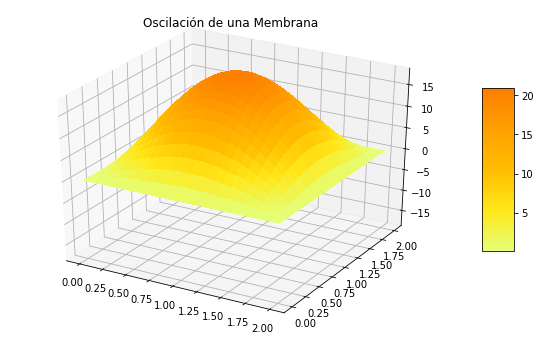

paso: 30.0 t= 0.885


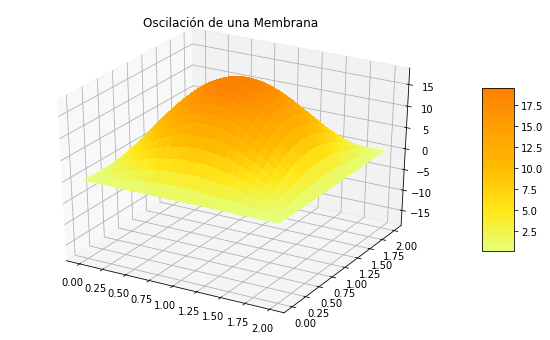

paso: 40.0 t= 1.185


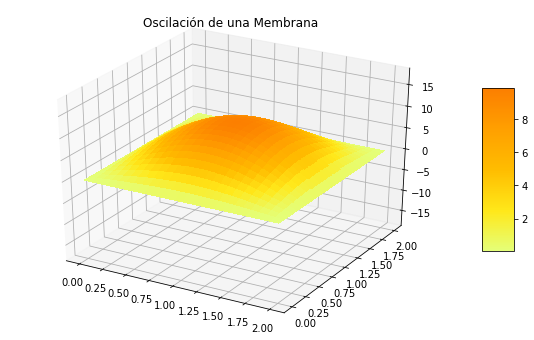

paso: 50.0 t= 1.4849999999999999


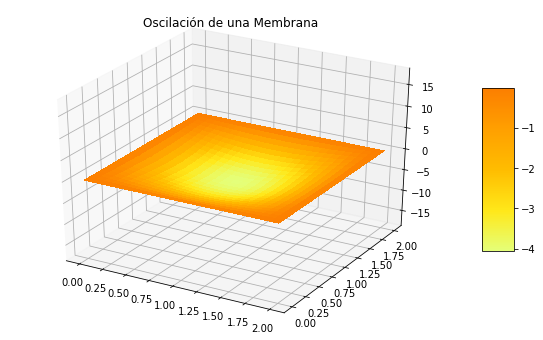

paso: 60.0 t= 1.785


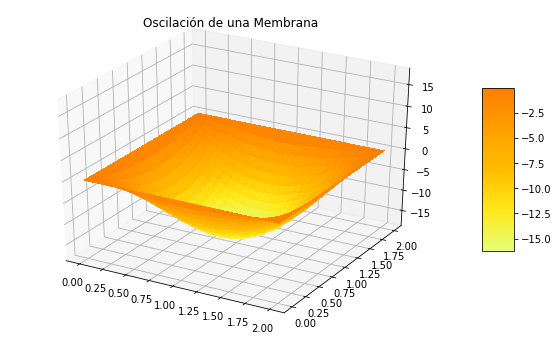

paso: 70.0 t= 2.085


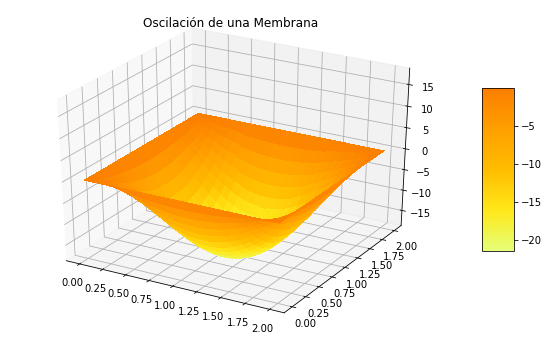

paso: 80.0 t= 2.385


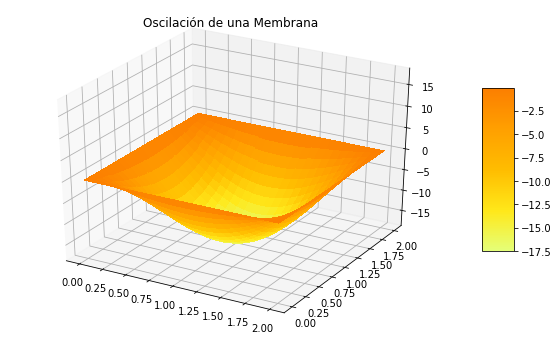

paso: 90.0 t= 2.685


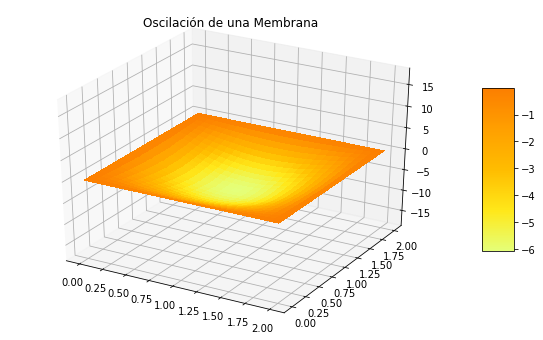

paso: 100.0 t= 2.985


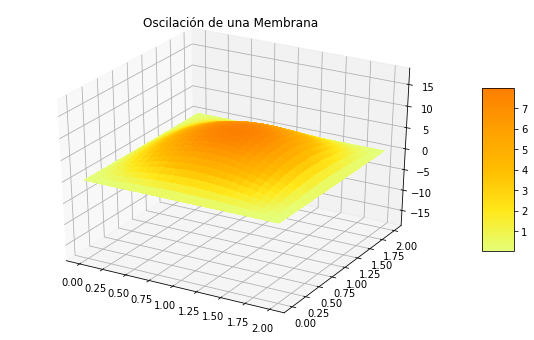

In [99]:
###Solución de la Ecuación de Onda en 2D por el método de diferencias finitas
#Se define la Clase general que incluye todas las funciones
class WaveEquationFD:
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: np.sin(np.pi*r/2)*np.sin(np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        #Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.Wistia, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-18, 18)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            #Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                #Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                #Creating color map
                my_cmap = plt.get_cmap('Wistia')
                #Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.Wistia, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_zlim(-18,18)
                ax2.set_title('Oscilación de una Membrana')
                #Show plot
                plt.show()

#Se definen los parámetros con los que se va a ejecutar el código     
#N pasos de integración, parámetro de estabilidad < 0.5, Num.Puntos x, Núm.Puntos y

def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate() 
    plt.show()
    
if __name__ == "__main__":
    main()



---



---



**Ejercicio 6:**

En el mismo contexto que el problema anterior, muestra la evolución de la superposición *modos (3,1)+ (1,3)* dada la condición inicial

\begin{equation*}
u_0^{(3,1)+(1,3)}(x,y,0) = \sin (\frac{3 \pi x}{2}) \sin (\frac{\pi y}{2}) + \sin (\frac{\pi x}{2}) \sin (\frac{3 \pi y}{2})
\end{equation*}

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


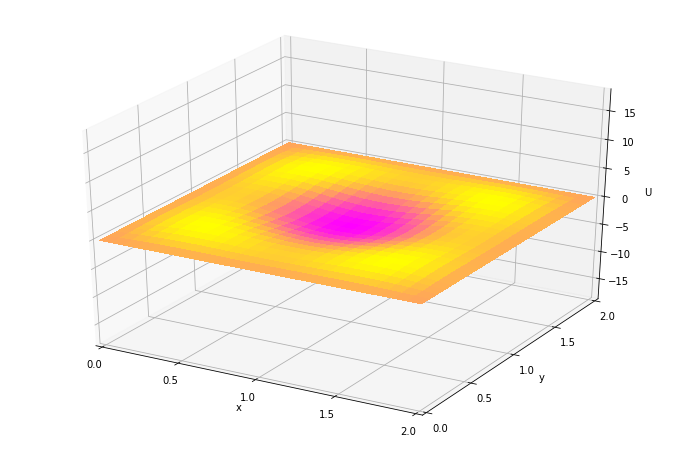

paso: 10.0 t= 0.285


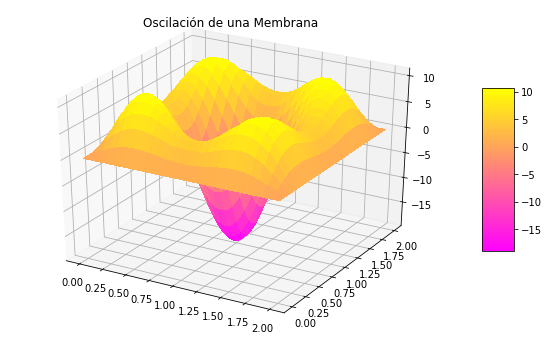

paso: 20.0 t= 0.585


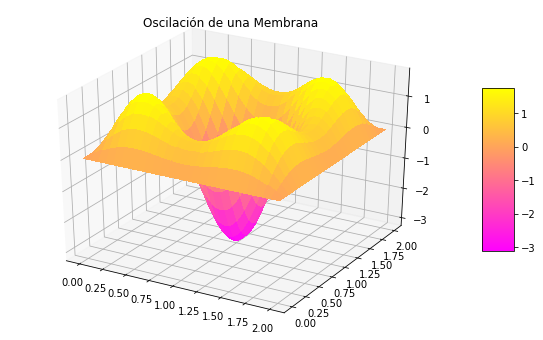

paso: 30.0 t= 0.885


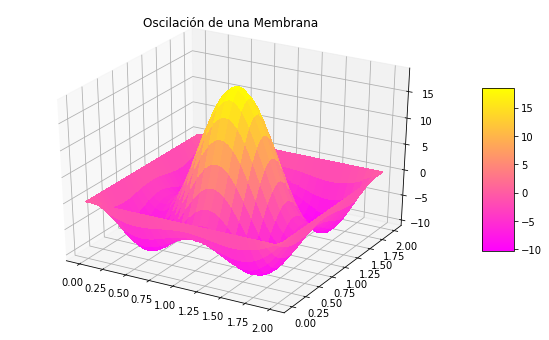

paso: 40.0 t= 1.185


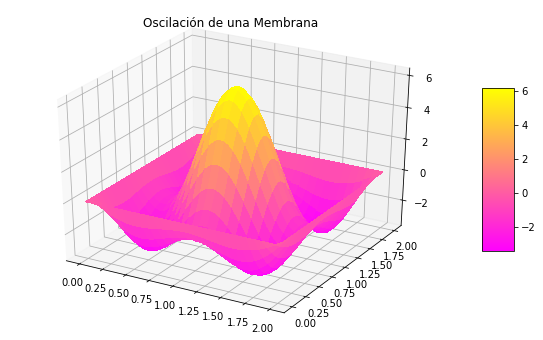

paso: 50.0 t= 1.4849999999999999


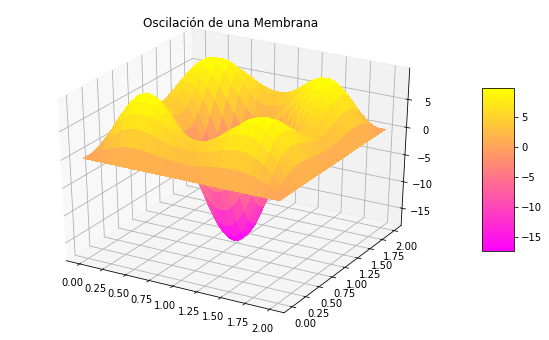

paso: 60.0 t= 1.785


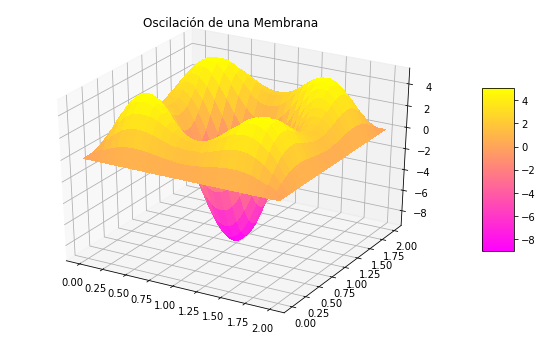

paso: 70.0 t= 2.085


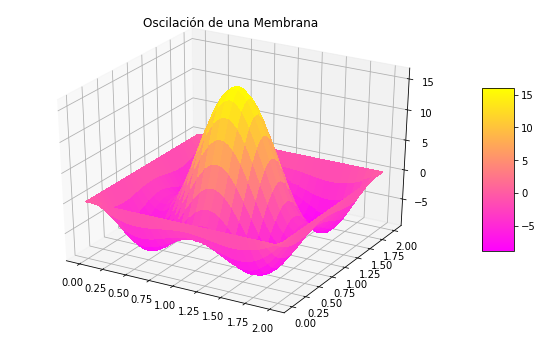

paso: 80.0 t= 2.385


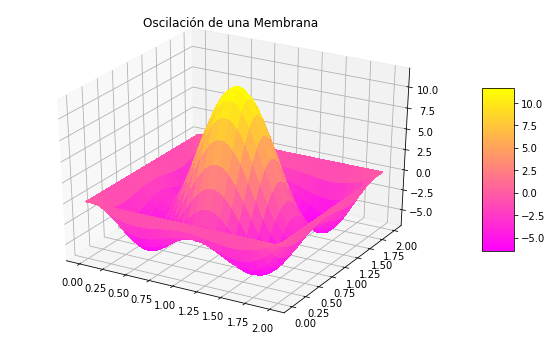

paso: 90.0 t= 2.685


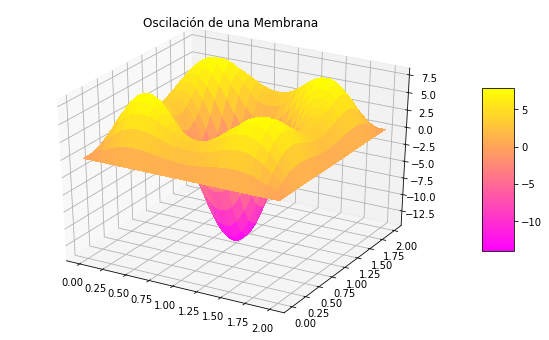

paso: 100.0 t= 2.985


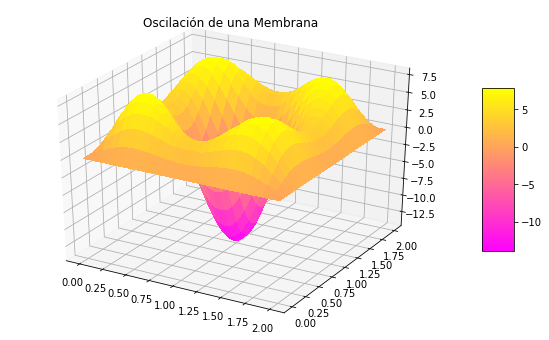

In [100]:
###Solución de la Ecuación de Onda en 2D por el método de diferencias finitas
#Se define la Clase general que incluye todas las funciones
class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        #----- Initial condition -----#
        self.u0 = lambda r, s: np.sin(3*np.pi*r/2) * np.sin(np.pi*s/2) + np.sin(np.pi*r/2) * np.sin(3*np.pi*s/2)
        
        #----- Initial velocity -----#
        self.v0 = lambda a, b: 0
        
        #----- Boundary conditions -----#
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        # Assertion for the condition of r < 1, for stability
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        #----- Approximation equation properties -----#
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        #----- Initialization matrix u for solution -----#
        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        #----- Fills initial condition and initial velocity -----#
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        u_2 = np.zeros((self.Mx+1, self.My+1))
        xx, yy = np.meshgrid(self.x, self.y)
      
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        #ax = plt.axes(projection ='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            #----- Fills in boundary condition along y-axis (vertical, columns 0 and Mx) -----#
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.spring, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-18, 18)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            #Sección añadida para hacer gráficas cada 15 pasos 
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                #Creating figure
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                #Creating color map
                my_cmap = plt.get_cmap('spring')
                #Creating plot
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.spring, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
                #Show plot
                plt.show()

#Se definen los parámetros con los que se va a ejecutar el código     
#N pasos de integración, parámetro de estabilidad < 0.5, Num.Puntos x, Núm.Puntos y

def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    #No funcionó en Google Colab
    simulator.solve_and_animate() 
    plt.show()
    
if __name__ == "__main__":
    main()



---



---

